## Naive Bayes
Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem, with an assumption of independence among features. It is used for classification tasks and is particularly effective with large datasets. The term "naive" refers to the assumption that all features are independent of each other given the class label.
##### Purpose:
The purpose of Naive Bayes is to classify data points into one of several predefined categories based on the values of features. It is widely used in text classification (e.g., spam detection), sentiment analysis, and other domains where feature independence is a reasonable assumption.
##### Key Concepts:
Bayes' Theorem: It calculates the probability of a class given the features.

    P(C∣X)=P(X∣C)⋅P(C)/P(X)
    
Where:
1.  P(C∣X) is the posterior probability of class C given features X.
2.  P(X∣C) is the likelihood of features X given class C.
3.  P(C) is the prior probability of class C.
4.  P(X) is the probability of features X.

## Gaussian distribution:
The Gaussian distribution, also known as the normal distribution, is a continuous probability distribution characterized by its bell-shaped curve. It is defined by two parameters:

•	Mean (μ): The center of the distribution.

•	Standard Deviation (σ\sigmaσ): Measures the spread of the distribution.

Mathematical Formula: The probability density function (PDF) of a Gaussian distribution is:

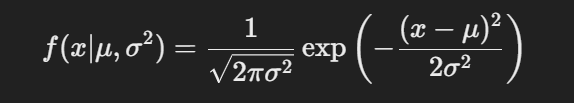

In [1]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from collections import defaultdict  # For handling missing values and creating dictionaries with default values
import matplotlib.pyplot as plt  # For data visualization
from sklearn.naive_bayes import GaussianNB  # For Naive Bayes classification

In [2]:
# Loading the Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['species'])

# Mapping target labels to iris species
data['species'] = data['species'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

# Displaying the first few rows of the dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

       species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


In [3]:
# Splitting the dataset into training and testing sets

# Selecting all columns except the last one as features (X)
X = data.iloc[:, :-1].values

# Selecting the last column as the target variable (y)
y = data.iloc[:, -1].values

# Splitting the data into training and testing sets
# 70% of the data will be used for training and 30% for testing
# random_state is set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Function to calculate the mean and standard deviation for each feature
def summarize_by_class(X, y):
    # Creating a dictionary to store summaries for each class
    summaries = defaultdict(list)
    
    # Iterating over each unique class label
    for label in np.unique(y):
        # Selecting all rows corresponding to the current class label
        features = X[y == label]
        
        # Calculating the mean and standard deviation for each feature
        summaries[label] = [(np.mean(feature), np.std(feature)) for feature in zip(*features)]
    
    # Returning the dictionary containing summaries for each class
    return summaries

In [6]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [7]:
# Function to calculate the Gaussian probability density function
def calculate_probability(x, mean, stdev):
    # Calculating the exponent part of the Gaussian probability density function
    exponent = np.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    
    # Calculating the final probability value
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

In [8]:
# Function to calculate the class probabilities for a given input
def calculate_class_probabilities(summaries, input_vector):
    # Initializing a dictionary to store the probabilities for each class
    probabilities = {}
    
    # Iterating over each class and its corresponding summaries
    for class_value, class_summaries in summaries.items():
        # Initializing the probability of the current class to 1
        probabilities[class_value] = 1
        
        # Iterating over each feature's mean and standard deviation in the current class
        for i in range(len(class_summaries)):
            mean, stdev = class_summaries[i]
            x = input_vector[i]
            
            # Multiplying the probabilities of each feature
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    
    # Returning the probabilities for each class
    return probabilities

In [9]:
# Function to make a prediction for a given input
def predict(summaries, input_vector):
    # Calculate the class probabilities for the given input
    probabilities = calculate_class_probabilities(summaries, input_vector)
    
    # Initialize variables to keep track of the best class and its probability
    best_label, best_prob = None, -1
    
    # Print the probabilities for debugging purposes
    print(probabilities)
    
    # Iterate over the calculated probabilities for each class
    for class_value, probability in probabilities.items():
        # Update the best label and probability if the current probability is higher
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
            
    # Return the class label with the highest probability
    return best_label

In [10]:
# Function to evaluate the accuracy of the model
def evaluate_model(summaries, X_test, y_test):
    correct = 0  # Initialize a counter for correctly predicted instances
    y_pred = []  # List to store predicted labels
    
    # Iterate over each instance in the test set
    for i in range(len(X_test)):
        input_vector = X_test[i]  # Extract the feature vector for the current instance
        true_label = y_test[i]  # Extract the true label for the current instance
        predicted_label = predict(summaries, input_vector)  # Predict the label using the model
        
        # Print the predicted and true labels for debugging purposes
        print("Predicted", predicted_label, "True", true_label)
        
        # Check if the prediction is correct
        if predicted_label == true_label:
            correct += 1  # Increment the counter if the prediction is correct
        
        # Append the predicted label to the list
        y_pred.append(predicted_label)
    
    # Calculate the accuracy of the model
    accuracy = correct / len(X_test)
    
    # Return the accuracy and the list of predicted labels
    return accuracy, y_pred

In [11]:
# Summarizing the training data by class
summaries = summarize_by_class(X_train, y_train)

# Displaying the summaries
summaries

defaultdict(list,
            {'Iris-setosa': [(4.964516129032259, 0.3346142575455468),
              (3.3774193548387097, 0.36957663435023635),
              (1.4645161290322577, 0.18236508419487185),
              (0.24838709677419357, 0.10737623856189187)],
             'Iris-versicolor': [(5.8621621621621625, 0.524714260130706),
              (2.724324324324324, 0.29537461821220007),
              (4.210810810810811, 0.48922651791278887),
              (1.3027027027027025, 0.20333235539247596)],
             'Iris-virginica': [(6.559459459459459, 0.6499311645295484),
              (2.986486486486486, 0.310328650689888),
              (5.545945945945946, 0.5370563383777094),
              (2.005405405405405, 0.29311555321809374)]})

In [12]:
# Evaluating the model

# Calculate the accuracy and predicted labels by evaluating the model on the test set
accuracy, y_pred = evaluate_model(summaries, X_test, y_test)

# Print the accuracy of the model
print(f'Accuracy: {accuracy}')

{'Iris-setosa': 3.819364566872026e-88, 'Iris-versicolor': 0.7660318658826788, 'Iris-virginica': 0.0034412108459275525}
Predicted Iris-versicolor True Iris-versicolor
{'Iris-setosa': 0.1880670217551684, 'Iris-versicolor': 2.0646523299900197e-14, 'Iris-virginica': 3.494454015975696e-21}
Predicted Iris-setosa True Iris-setosa
{'Iris-setosa': 2.3233632571942638e-287, 'Iris-versicolor': 5.348993080940257e-15, 'Iris-virginica': 0.001980094348251244}
Predicted Iris-virginica True Iris-virginica
{'Iris-setosa': 8.152283962643816e-92, 'Iris-versicolor': 0.6974409547337572, 'Iris-virginica': 0.017984777902018273}
Predicted Iris-versicolor True Iris-versicolor
{'Iris-setosa': 2.1672636827285892e-104, 'Iris-versicolor': 0.13899956541713993, 'Iris-virginica': 0.028085151216358836}
Predicted Iris-versicolor True Iris-versicolor
{'Iris-setosa': 1.6210218247921802, 'Iris-versicolor': 9.204114449941676e-13, 'Iris-virginica': 9.709314209511034e-21}
Predicted Iris-setosa True Iris-setosa
{'Iris-setosa': 

In [13]:
# Create a confusion matrix using pandas crosstab
confusion_matrix = pd.crosstab(y_test, y_pred)

# Display the confusion matrix
confusion_matrix

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,19,0,0
Iris-versicolor,0,12,1
Iris-virginica,0,0,13


In [14]:
# Initialize a Gaussian Naive Bayes model
model = GaussianNB()

In [15]:
# Train the Gaussian Naive Bayes model using the training data
model.fit(X_train, y_train)

GaussianNB()

In [16]:
# Predict the labels for the test set using the trained Gaussian Naive Bayes model
y_pred_builtin = model.predict(X_test)

In [17]:
# Create a confusion matrix for the predictions made by the built-in Gaussian Naive Bayes model
confusion_matrix_builtin = pd.crosstab(y_test, y_pred_builtin)

# Display the confusion matrix
confusion_matrix_builtin

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,19,0,0
Iris-versicolor,0,12,1
Iris-virginica,0,0,13
